In [ ]:
# Model 7 : Multi-layer Perceptron Classification model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, RocCurveDisplay
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate, GridSearchCV
from sklearn.utils import shuffle

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import multiprocessing

# estimator 불러와서 model 만들기
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# 파일을 업로드하여 사용
from google.colab import files 
uploaded = files.upload()

In [ ]:
# 업로드한 파일을 데이터셋으로 설정
import io 
data = pd.read_csv(io.BytesIO(uploaded['emails.csv']))

In [ ]:
# 데이터 배열 형태 확인
data.shape 

NameError: ignored

In [ ]:
# 데이터 생김새 파악 (필요없는 부분 체크)
data.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# 필요한 데이터만 사용하기 위해 인덱싱 정보인 Email No.를 데이터에서 제거
data.drop(columns=['Email No.'], inplace=True)
data.head()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# null 값이 있는지 체크(False : 없음)
data.isnull().any().value_counts()

False    3001
dtype: int64

In [ ]:
# 각 칼럼의 null값의 개수를 확인 (0 : 없음)
data.isnull().sum()

the           0
to            0
ect           0
and           0
for           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3001, dtype: int64

In [ ]:
# prediction(마지막 열)을 제외한 특징 배열을 X라고 정의
X = data.iloc[:, :data.shape[1]-1]
X

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,0,1,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# 대상 벡터인 prediction(스팸인지 아닌지)을 y라고 정의
y = data.iloc[:, -1]
y

0       0
1       0
2       0
3       0
4       0
       ..
5167    0
5168    0
5169    1
5170    1
5171    0
Name: Prediction, Length: 5172, dtype: int64

In [ ]:
# X와 y 각각의 형태 파악
X.shape, y.shape

((5172, 3000), (5172,))

Visualizing Ratio of Normal Email & Spam Email:



<function matplotlib.pyplot.show>

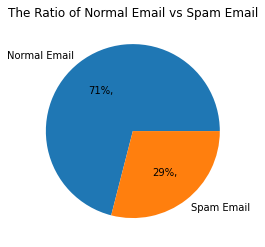

In [ ]:
# 스팸메일을 퍼센트로 표기 (시각화)
print("Visualizing Ratio of Normal Email & Spam Email:\n")
count_Class = pd.value_counts(data['Prediction'], sort=True)
count_Class.plot(kind = 'pie',labels=['Normal Email','Spam Email'], autopct='%1.0f%%,')
plt.title('The Ratio of Normal Email vs Spam Email')
plt.ylabel('')
plt.show

In [ ]:
# 위의 과정으로 데이터 불러와서 특징 배열과 대상 벡터로 나누기 완료
from sklearn.model_selection import train_test_split

# 이제 훈련 데이터와 테스트 데이터로 분리
## test_size=0.33, random_state=42 / ##test_size=0.15, random_state=8 / ##상상 test_size=0.10, random_state=6 
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.15, random_state=8)
#X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.33, random_state=8)
#X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.15, random_state=42)
#X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.33, random_state=42)
#X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.10, random_state=6)
#X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.10, random_state=8)
#X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.15, random_state=6)

In [ ]:
# Model 7 : Multi-layer Perceptron Classification model (모델 불러오기)
model7 =  MLPClassifier(hidden_layer_sizes=[20, 20], learning_rate='adaptive', random_state=8)

# model을 훈련 데이터에 적합
model7.fit(X_train, y_train)
y_predMPC = model7.predict(X_test)

# model을 테스트 데이터에 대해서 적용
target_labels = ['Normal Email','Spam Email']
print(classification_report(y_predMPC, y_test, target_names=target_labels))

# 예측 정확도 측정
print("Accuracy score for Multi-layer Perceptron Classification model: ", accuracy_score(y_predMPC, y_test))

# 교차검증 정확도
X, y = shuffle(X, y)
scores = cross_val_score(model7, X, y, cv=8)
print("Cross Validation Accuracy: {}".format(scores))
print("Cross Validation Accuracy: {} +/- {}".format(np.mean(scores), np.std(scores)))

NameError: ignored

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Text(0.5, 1.0, 'Scalability of the model')

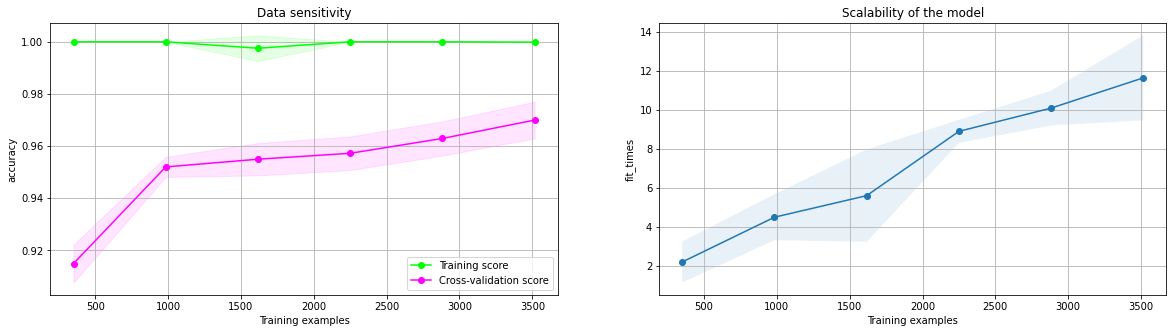

In [ ]:
# Learning Curve Accuracy Graph

from sklearn.model_selection import learning_curve
n_folds = 5
train_sizes = np.linspace(0.1, 1.0, 6)

train_sizes, train_scores, test_scores, fit_times, _ =\
    learning_curve(model7, X_train, y_train,
                   cv=n_folds, train_sizes=train_sizes,
                   scoring = 'accuracy',
                   return_times=True)
    
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

import matplotlib.pyplot as plt

_, axes = plt.subplots(1, 2, figsize=(20, 5))
axes[0].grid()
axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,color="lime")
axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1,color="fuchsia")
axes[0].plot(train_sizes, train_scores_mean, 'o-', color="lime",label="Training score")
axes[0].plot(train_sizes, test_scores_mean, 'o-', color="fuchsia",label="Cross-validation score")
axes[0].legend(loc="best")
axes[0].set_xlabel("Training examples")
axes[0].set_ylabel("accuracy")
axes[0].set_title("Data sensitivity")
axes[1].grid()
axes[1].plot(train_sizes, fit_times_mean, 'o-')
axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,fit_times_mean + fit_times_std, alpha=0.1)
axes[1].set_xlabel("Training examples")
axes[1].set_ylabel("fit_times")
axes[1].set_title("Scalability of the model")

No Method: ROC AUC=0.500
RBF SVM: ROC AUC=0.997


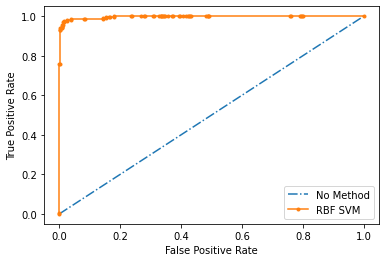

In [ ]:
# ROC Curve Graph

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# 확률 예측
model_probs = model7.predict_proba(X_test)
model_probs = model_probs[:, 1]
no_probs = [0 for _ in range(len(y_test))]

# 점수 계산
no_auc = roc_auc_score(y_test, no_probs)
model_auc = roc_auc_score(y_test, model_probs)

print('No Method: ROC AUC=%.3f' % (no_auc))
print('RBF SVM: ROC AUC=%.3f' % (model_auc))

no_fpr, no_tpr, _ = roc_curve(y_test, no_probs)
model_fpr, model_tpr, _ = roc_curve(y_test, model_probs)

plt.plot(no_fpr, no_tpr, linestyle='-.', label='No Method')
plt.plot(model_fpr, model_tpr, marker='.', label='RBF SVM')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Precision-Recall curve: AP=0.99')

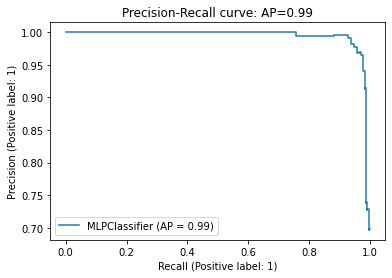

In [ ]:
# Precision Recall Curve Graph

y_score = model7.predict_proba(X_test)

from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score[:,1])

from sklearn.metrics import plot_precision_recall_curve
disp = plot_precision_recall_curve(model7, X_test, y_test)
disp.ax_.set_title('Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

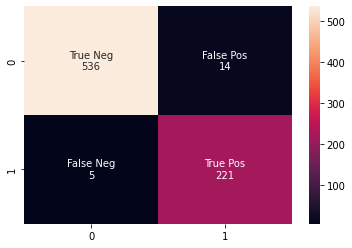

In [ ]:
cm = confusion_matrix(y_test, y_predMPC)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2, in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='')